Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn .linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv(r"/content/Heart_Disease_Prediction.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(270, 14)

In [5]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [6]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [8]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
summary_stats = df.describe(include='all')
print(summary_stats)

              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

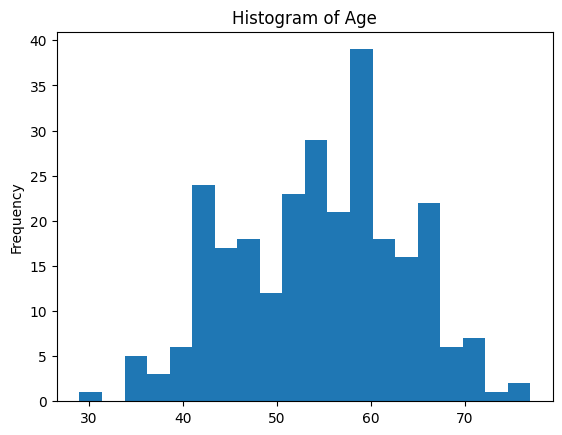

In [10]:
df['Age'].plot(kind='hist', bins=20)
plt.title('Histogram of Age')
plt.show()

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


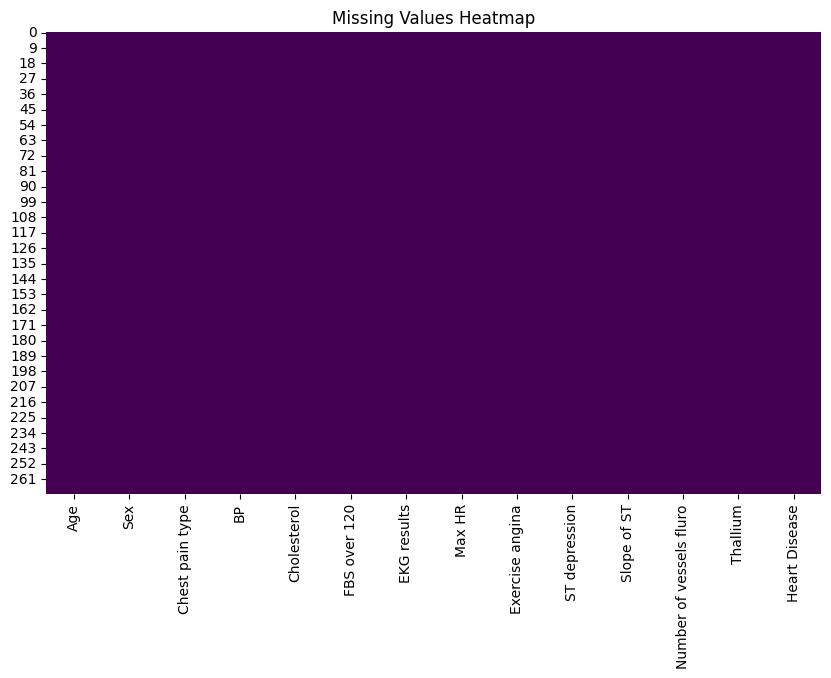

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [13]:
total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


In [14]:
df.rename(columns={"Heart Disease": "Result"}, inplace=True)
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Result
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


1. Age: The person's age in years
2. Sex: Gender (1 = Male, 0 = Female)
3. Chest pain type: (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
4. BP: Blood Pressure
5. Cholestrol: Cholestrol in mg/dl
6. FBS over 120: Fast blood sugar > 120 mg/dl (1 = true, 0 = false)
7. EKG result: Electrocardiogram
8. Max HR: Maximum heart rate
9. ST depression
10. Slope of ST: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
11. Number of vessels fluro
12. Thallium
13. Result: Predicting if the patient is suffering from heart disease or not. (1 - Present, 0 - Absence)

In [15]:
print(df.corr()["Result"].abs().sort_values(ascending=False))

Result                     1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
Max HR                     0.418514
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120               0.016319
Name: Result, dtype: float64


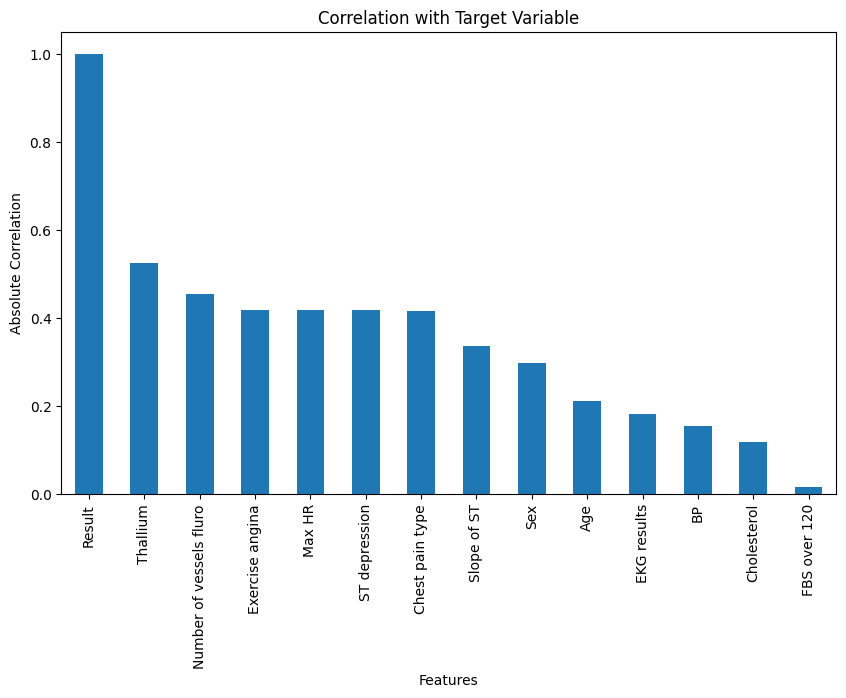

In [16]:
correlations = df.corr()["Result"].abs().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

### Exploratory Data Analysis

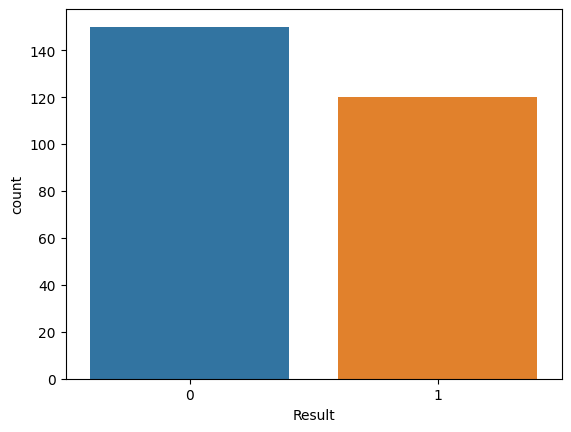

In [17]:
sns.countplot(x='Result', data=df)
plt.show()

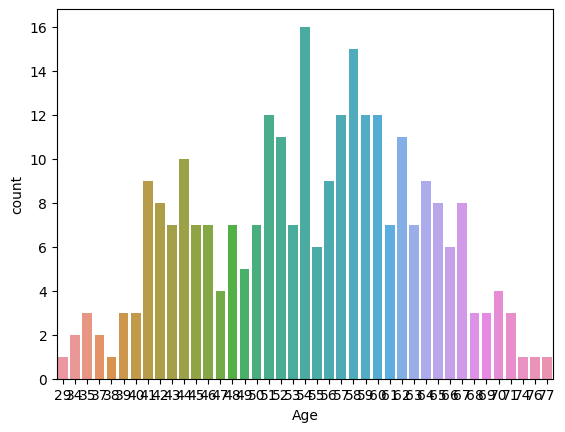

In [18]:
sns.countplot(x='Age', data=df)
plt.show()

<Axes: xlabel='Chest pain type', ylabel='count'>

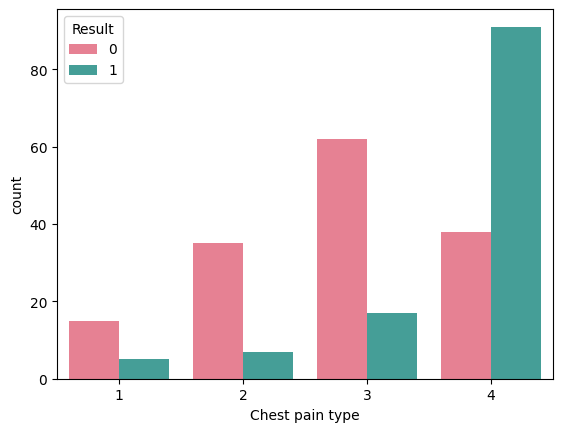

In [19]:
sns.countplot(x='Chest pain type', hue='Result', data=df, palette='husl')

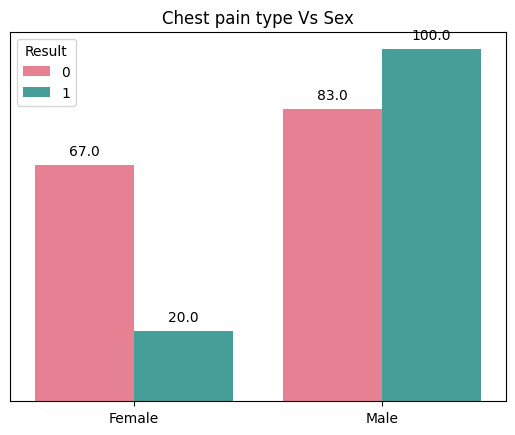

In [20]:
disease = sns.countplot(x='Sex', hue='Result', data=df, palette='husl')

plt.title("Chest pain type Vs Sex")
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel("")
plt.ylabel("")
plt.yticks([])

for p in disease.patches:
    disease.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

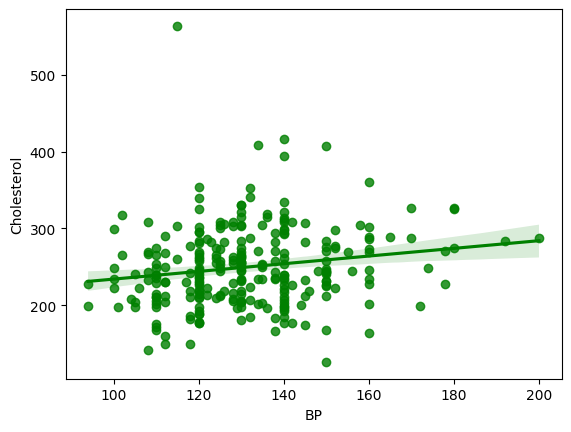

In [21]:
disease= sns.regplot(x='BP', y = 'Cholesterol', data = df, color = 'g')

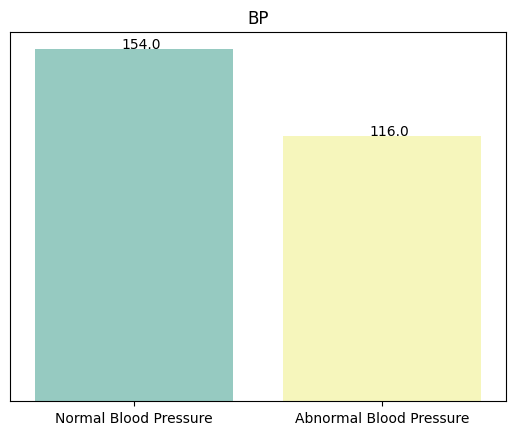

In [22]:
df['Bloodpressure'] = df['BP'].apply(lambda k: 1 if k > 130 else 0)

disease = sns.countplot(x='Bloodpressure', data=df, palette='Set3')

plt.title("BP")
plt.xticks([0, 1], ["Normal Blood Pressure", "Abnormal Blood Pressure"])
plt.xlabel("")
plt.ylabel("")
plt.yticks([])

for p in disease.patches:
    disease.annotate(p.get_height(), (p.get_x() + 0.35, p.get_height() + 0.5))

plt.show()

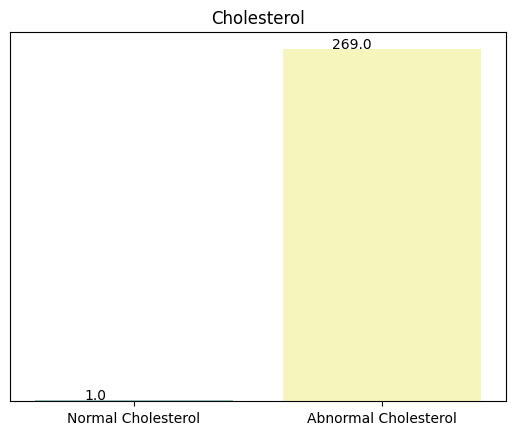

In [23]:
df['Cholesterol'] = df['Cholesterol'].apply(lambda k: 1 if k > 130 else 0)

disease = sns.countplot(x='Cholesterol', data=df, palette='Set3')

plt.title("Cholesterol")
plt.xticks([0, 1], ["Normal Cholesterol", "Abnormal Cholesterol"])
plt.xlabel("")
plt.ylabel("")
plt.yticks([])

for p in disease.patches:
    disease.annotate(p.get_height(), (p.get_x() + 0.2, p.get_height() + 0.5))

plt.show()

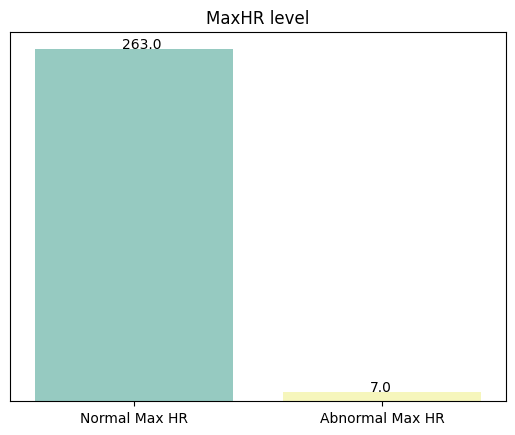

In [24]:
df['MaxHR_level'] = df['Max HR'].apply(lambda k: "Normal Max HR" if k > 100 else "Abnormal Max HR")

disease = sns.countplot(x='MaxHR_level', data=df, palette='Set3')

plt.title("MaxHR level")
plt.xlabel("")
plt.ylabel("")
plt.yticks([])

for p in disease.patches:
    disease.annotate(p.get_height(), (p.get_x() + 0.35, p.get_height() + 0.5))

plt.show()

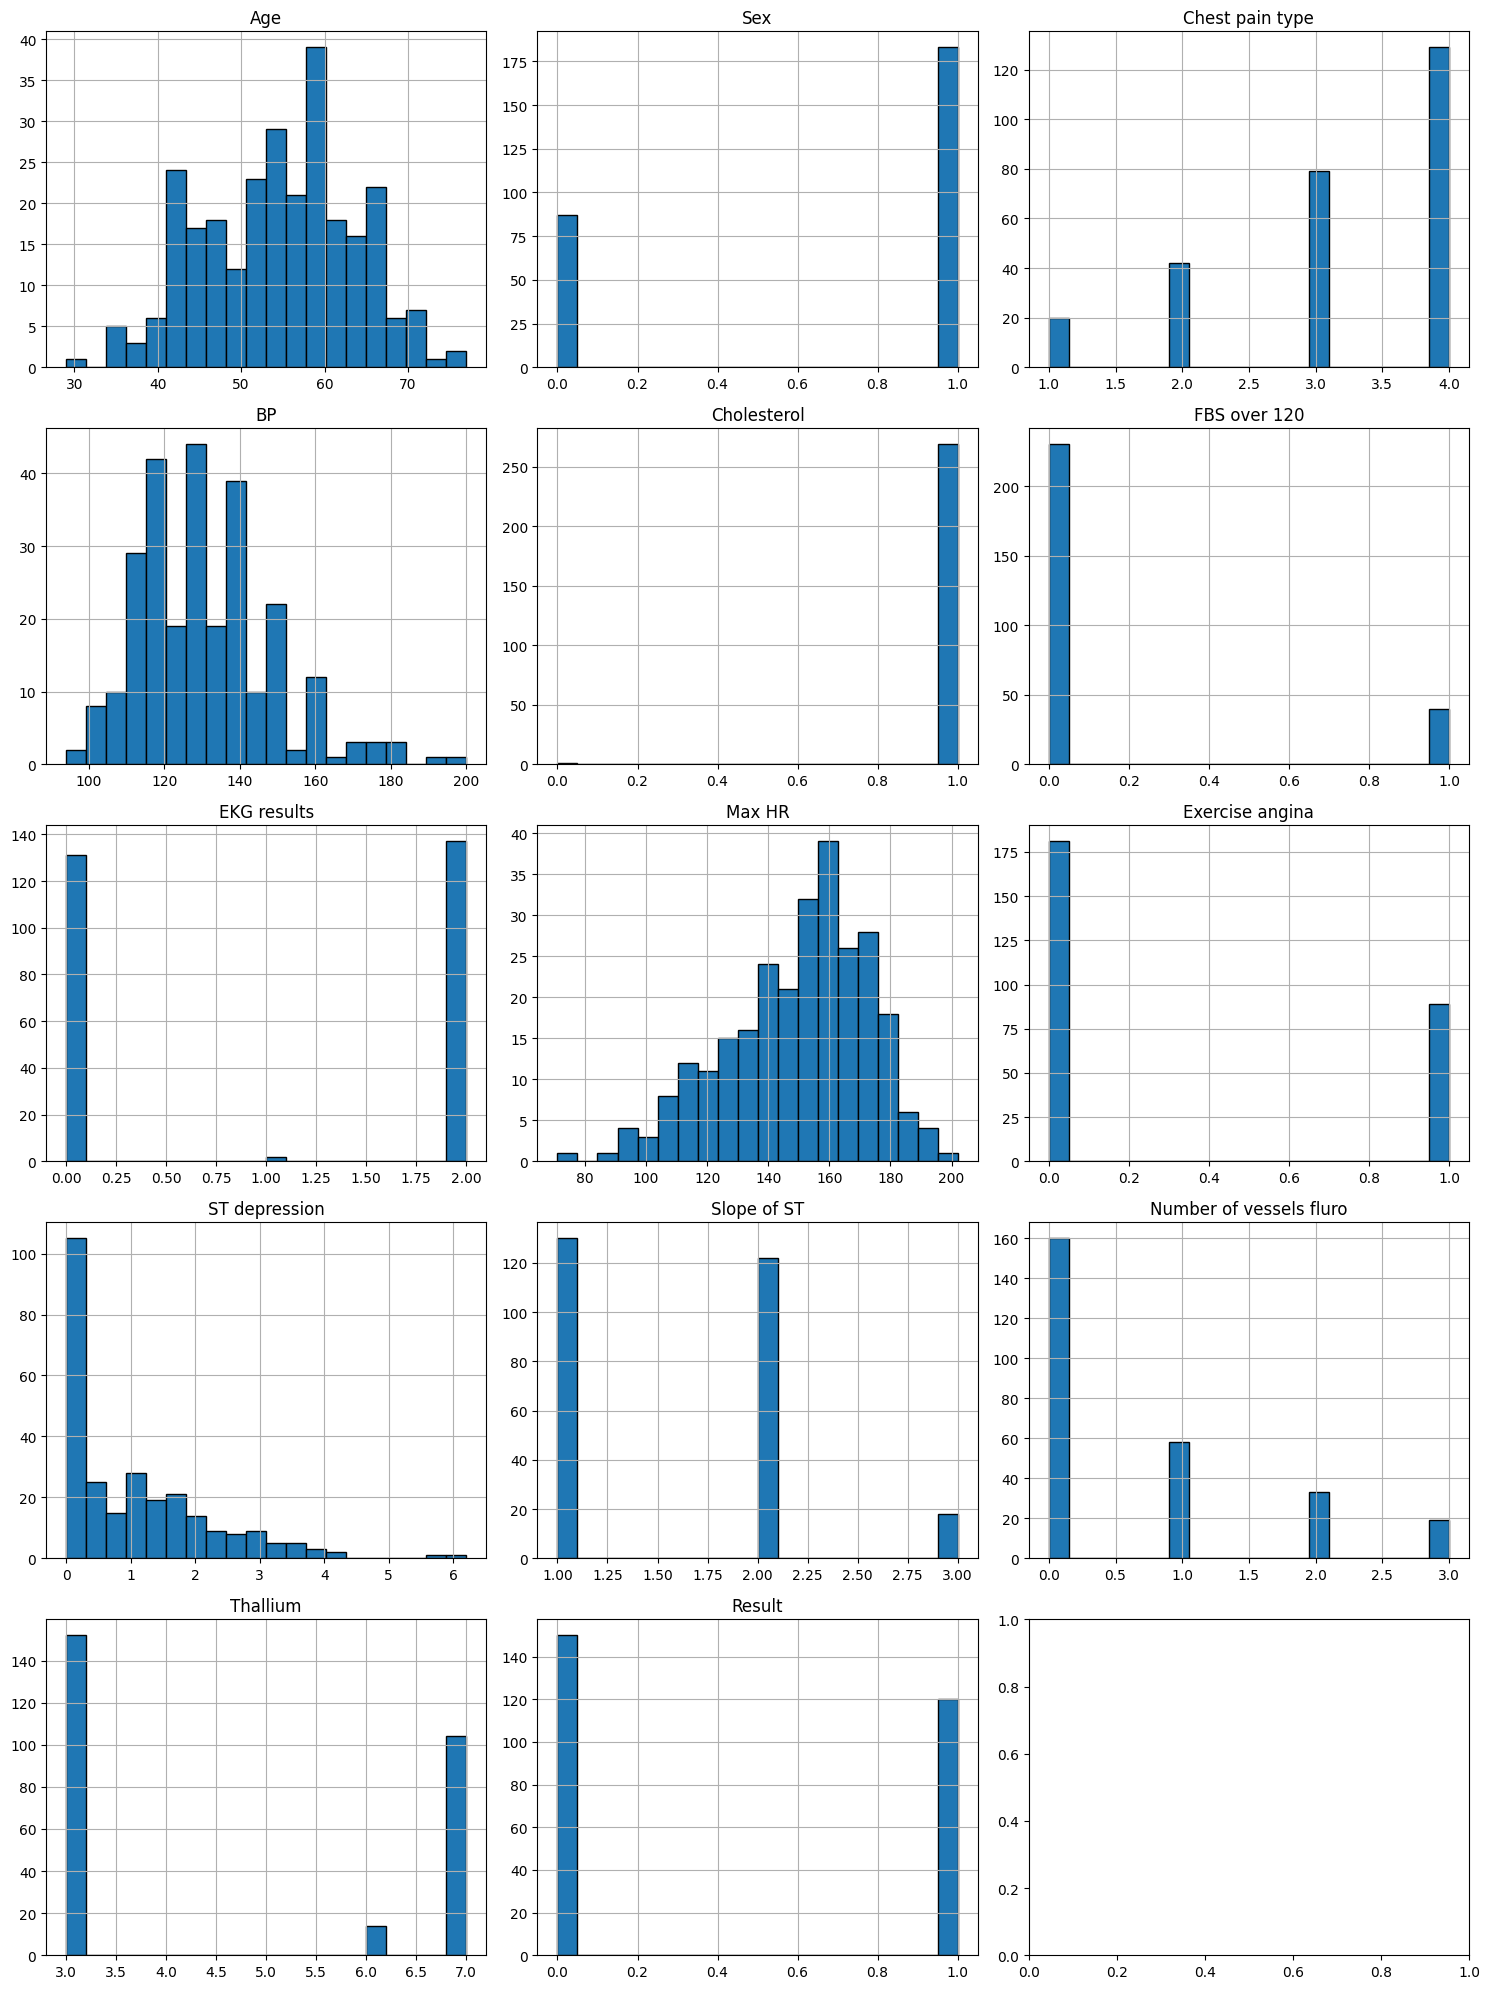

In [25]:
columns = df.columns[:14]

# Calculate the number of rows for subplots
num_rows = (len(columns) + 2) // 3

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns):
    df[col].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(col)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Logistic Regression

In [26]:
X = df.drop('Result', axis=1)
X_encoded = pd.get_dummies(X)  # Perform one-hot encoding on categorical variables

y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
Logistic_regression = LogisticRegression()
Logistic_regression.fit(X_train, y_train)
test_pred = Logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
lr_accuracy = accuracy_score(y_test, Logistic_regression.predict(X_test))
print(f'The accuracy of the Logistic Regression is {lr_accuracy}')

The accuracy of the Logistic Regression is 0.9074074074074074


In [28]:
test_conf_matrix = confusion_matrix(y_test, test_pred)
test_conf_matrix

array([[32,  1],
       [ 4, 17]])

In [29]:
test_classification_report = classification_report(y_test, test_pred)
print(test_classification_report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



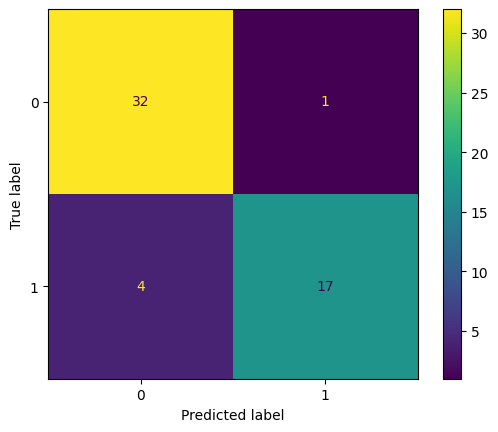

In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1])

cm_display.plot()
plt.show()

### Decision Tree Classifier

In [31]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)
dt_pred = Dt.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred)

print(f'The accuracy of the Decision Tree is {accuracy}')

The accuracy of the Decision Tree is 0.7222222222222222


In [32]:
accuracy = accuracy_score(y_test, dt_pred)
test_classification_report = classification_report(y_test, dt_pred)
print(test_classification_report)

              precision    recall  f1-score   support

           0       0.82      0.70      0.75        33
           1       0.62      0.76      0.68        21

    accuracy                           0.72        54
   macro avg       0.72      0.73      0.72        54
weighted avg       0.74      0.72      0.73        54



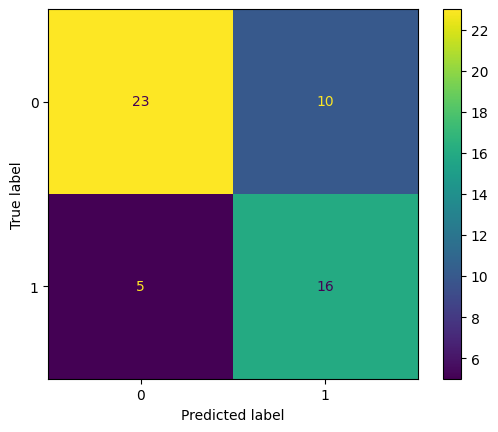

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred)

# Make sure the display_labels match the number of classes in your problem
display_labels = [0,1]

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=display_labels)  # Make sure the display_labels match the number of classes

cm_display.plot()
plt.show()

### Comparison between two accuracies

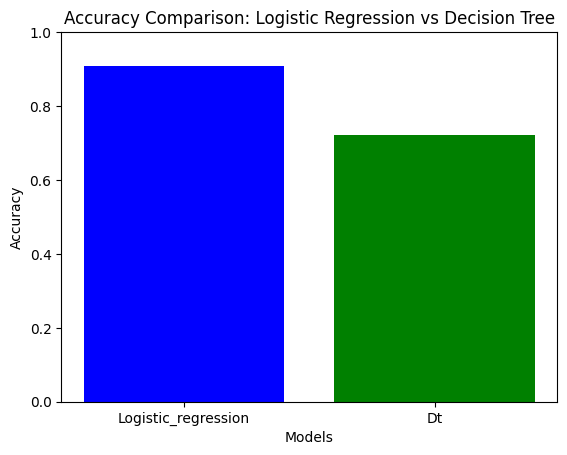

In [34]:
models = ['Logistic_regression', 'Dt']
accuracies = [lr_accuracy, accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1.0)  # Set y-axis limit to represent accuracy values

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Logistic Regression vs Decision Tree')
plt.show()